In [1]:
import numpy as np
from scipy.spatial.transform import Rotation

m=60
X=np.zeros((m,3)) #3d
np.random.seed(42)
angles=(np.random.rand(m)**3+0.5)*2*np.pi #uneven distribution
X[:,0],X[:,1]=np.cos(angles),np.sin(angles)*0.5  #oval
X+=0.28*np.random.randn(m,3) #add more noise
X=Rotation.from_rotvec([np.pi/29,-np.pi/20,np.pi/4]).apply(X)
X+=[0.2,0,0.2] #shift a bit

In [2]:
X.shape

(60, 3)

In [3]:
from sklearn.decomposition import PCA #Principal component analysis

pca=PCA(n_components=2)
X2D=pca.fit_transform(X)
X2D.shape

(60, 2)

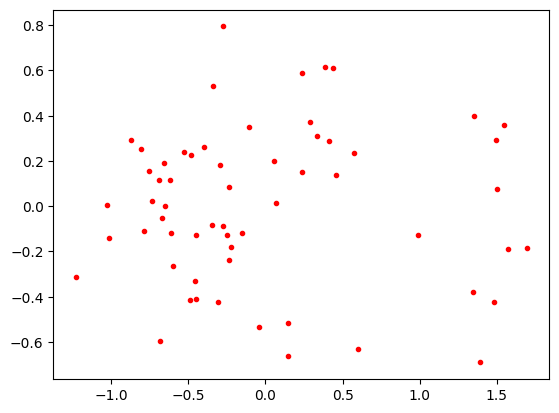

In [4]:
import matplotlib.pyplot as plt
plt.plot(X2D[:,0],X2D[:,1],"r.");

In [5]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

In [6]:
1-pca.explained_variance_ratio_.sum()

np.float64(0.09028309326742034)

#Choosing the righ number of Dimensions

In [7]:
from sklearn.datasets import fetch_openml

mnist=fetch_openml('mnist_784',as_frame=False,parser="auto")
X_train,y_train=mnist.data[:60_000],mnist.target[:60_000]

X_train.shape

(60000, 784)

In [8]:
pca=PCA()
pca.fit(X_train)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

np.int64(154)

In [9]:
pca=PCA(n_components=0.95)
X_reduced=pca.fit_transform(X_train)

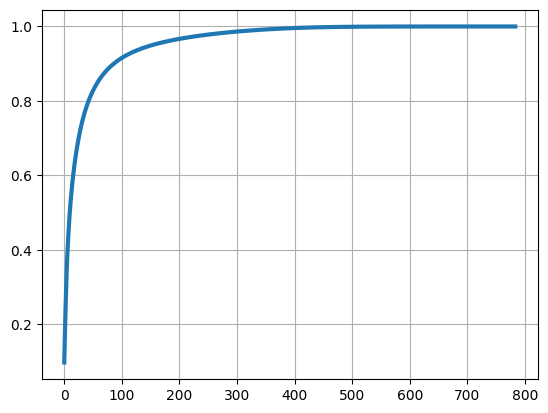

In [10]:
plt.plot(cumsum,linewidth=3)
plt.grid();

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline

clf=make_pipeline(PCA(random_state=42),
                  RandomForestClassifier(random_state=42))

params={
    'pca__n_components':np.arange(10,80),
    'randomforestclassifier__n_estimators':np.arange(50,500)
}

rnd_search=RandomizedSearchCV(clf,params,n_iter=10,cv=3,random_state=42)
rnd_search.fit(X_train[:1000],y_train[:1000])

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA(random_state=42)),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       6...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [12]:
from sklearn.decomposition import IncrementalPCA

n_batches=100
inc_pca=IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train,n_batches):
  inc_pca.partial_fit(X_batch)

X_reduced=inc_pca.transform(X_train)

#LLE->Locally Linear Embedding

In [13]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import LocallyLinearEmbedding

X_swiss,t=make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)
X_reduced=lle.fit_transform(X_swiss)

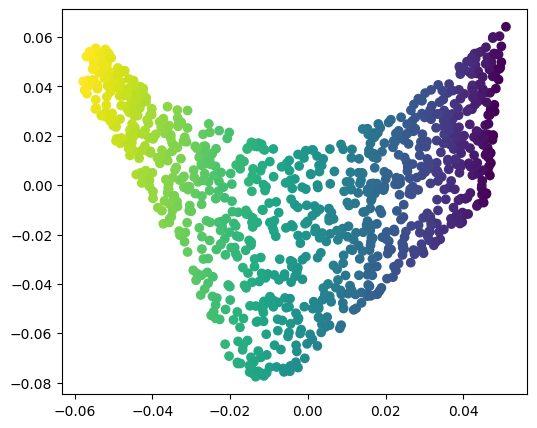

In [14]:
plt.figure(figsize=(6,5))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=t);

In [15]:
from sklearn.manifold import TSNE

tsne=TSNE(n_components=2,random_state=42)
X_reduced_tsne=tsne.fit_transform(X_swiss)

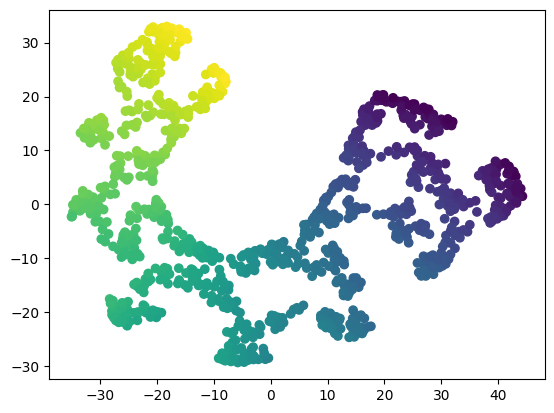

In [16]:
plt.scatter(X_reduced_tsne[:,0],X_reduced_tsne[:,1],c=t);